# Инструкция по выполнению

Мы будем использовать в данном задании набор данных Boston, где нужно
предсказать стоимость жилья на основе различных характеристик
расположения (загрязненность воздуха, близость к дорогам и т.д.). Подробнее
о признаках можно почитать по адресу
https://archive.ics.uci.edu/ml/datasets/Housing

1. Загрузите выборку Boston с помощью функции sklearn.datasets.load_boston().
Результатом вызова данной функции является объект, у которого
признаки записаны в поле data, а целевой вектор — в поле target.

2. Приведите признаки в выборке к одному масштабу при помощи
функции sklearn.preprocessing.scale.

3. Переберите разные варианты параметра метрики p по сетке от 1 до
10 с таким шагом, чтобы всего было протестировано 200 вариантов
(используйте функцию numpy.linspace). Используйте KNeighborsRegressor
с n_neighbors=5 и weights=’distance’ — данный параметр добавляет
в алгоритм веса, зависящие от расстояния до ближайших соседей. В
качестве метрики качества используйте среднеквадратичную ошибку
(параметр scoring=’mean_squared_error’ у cross_val_score; при
использовании библиотеки scikit-learn версии 18.0.1 и выше необходимо
указывать scoring=’neg_mean_squared_error’). Качество оценивайте,
как и в предыдущем задании, с помощью кросс-валидации
по 5 блокам с random_state = 42, не забудьте включить перемешивание
выборки (shuffle=True).

4. Определите, при каком p качество на кросс-валидации оказалось
оптимальным. Обратите внимание, что cross_val_score возвращает 
массив показателей качества по блокам; необходимо максимизировать
среднее этих показателей. Это значение параметра и будет
ответом на задачу.

Если ответом является нецелое число, то целую и дробную часть
необходимо разграничивать точкой, например, 0.4. При необходимости
округляйте дробную часть до одного знака.
Ответ на каждое задание — текстовый файл, содержащий ответ в
первой строчке. Обратите внимание, что отправляемые файлы не должны
содержать перевод строки в конце. Данный нюанс является ограничением
платформы Coursera. Мы работаем над тем, чтобы убрать это
ограничение.

In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
X, y = datasets.load_boston().data, datasets.load_boston().target

In [22]:
X_scaled = scale(X)

In [28]:
p = np.linspace(1, 10, 200)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for i in p:
    model = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='minkowski', p=i)
    score = np.mean(cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error'))
    scores.append(score)

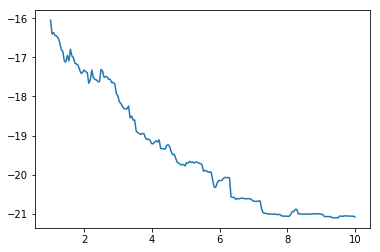

In [29]:
plt.plot(p, scores)
plt.show()

In [30]:
print(max(scores))

-16.050208508436157
